# CQC: Entrenamiento

El objetivo de este trabajo es la clasificación de diferentes tipos de camino dado el archivo vectorial de los mismos.

Los caminos se clasifican en cuatro categorías: 
* HOR hormigón
* ASF asfalto
* GRA granular
* NAT natural

Si el modelo no clasifica en ninguna de estas entonces se le asigna como "otros".

El método de análisis y predicción está dado por el modelo de machine learning U-Net. Este debe entrenarse con un subconjunto de los datos, siendo en este ejemplo menor al 5% de la totalidad.

Los datos de entrenamiento se componen de dos partes: las imágenes y las máscaras. Las máscaras marcan la región de interés de cada imagen. Por ejemplo, marca donde hay un camino de hormigón o uno granular. Cada imagen debe poseer su correspondiente máscara.

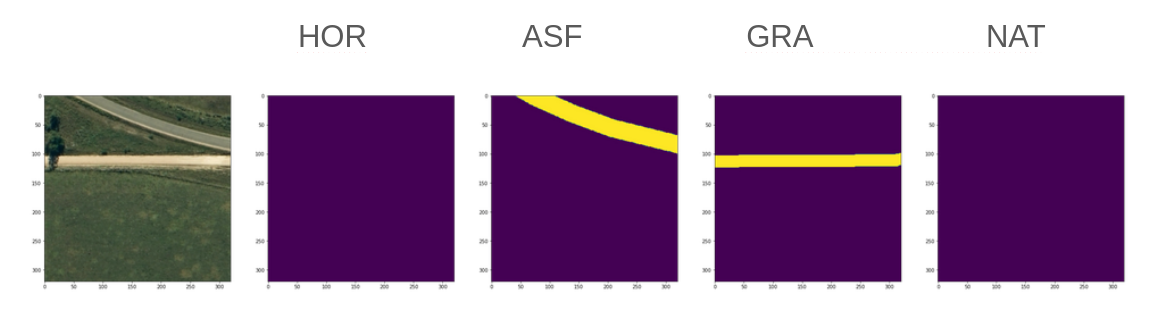

In [10]:
from IPython.display import Image
Image("/home/ro/meduy-cqc/img/caminos1.png")


## Preparación de datos

A lo largo de este proyecto se trabaja con los archivos vectoriales de caminos. Estos deben ser polígonos y no líneas, de modo que se les aplica un buffer. Dicho proceso fue realizado usando **qgis** debido a fue necesario ver la imagen para determinar el tamaño de buffer. Este debe ser lo suficientemente grande para cubrir todo el ancho del camino y un poco mas (aproximadamente 50cm a 1mts mas de cada lado), para dar contexto al modelo.

* Obs: Para los caminos de la categoría HOR y ASF en buffer debe ser de 7 o 8 mts y para la categoría NAT y GRA de 5 mts

Además a este punto ya se debió descargar las imágenes  utilizando los scripts de ideuy.


Los archivos vectoriales se encuentran listos en la carpeta /shp
* caminos-labels.geojson es el archivo vectorial con la verdad de campo de las 4 categorias que se usará para el entrenamiento 


In [17]:
!ls data/shp

caminos-labels.geojson	caminos_lineas_5382_test.geojson
caminos_5382.geojson	caminos_lineas_5382_test2.geojson
caminos_lineas.geojson	caminos_pred.geojson


## Preprocesamiento


La generacion de las imagenes y mascaras se realiza vía *meduy_extract_chips*. Esta herramienta se utiliza tanto en la generación del dataset de entrenamiento como en el de predicción, en el primer caso se generan las imagenes y las mascaras y en el segundo solo las imagenes.

Para el entrenamiento:

In [25]:

!ogr2ogr -t_srs epsg:5382 /home/ro/meduy-cqc/data/shp/caminos-labels_5382.geojson /home/ro/meduy-cqc/data/shp/caminos-labels.geojson -f GeoJSON

In [ ]:
!meduy_extract_chips /home/ro/meduy-cqc/data/tmp/*.jpg -o /home/ro/meduy-cqc/data/data_train_R1/400_200/ --size 400 --step-size 200 --crs epsg:5382 --labels /home/ro/meduy-cqc/data/shp/caminos-labels_5382.geojson --label-property "tipo_pav" --aoi /home/ro/meduy-cqc/data/shp/caminos-labels_5382.geojson --classes 'HOR' 'ASF' 'GRA' 'NAT' --bands 1 2 3

 10%|███▉                                    | 724/7380 [00:11<02:16, 48.92it/s]


 20%|███████▊                               | 1470/7380 [00:23<01:38, 59.89it/s]


 30%|███████████▊                           | 2242/7380 [00:35<01:11, 71.55it/s]


 40%|███████████████▊                       | 2987/7380 [00:48<01:19, 55.34it/s]


 51%|███████████████████▋                   | 3727/7380 [00:59<00:58, 62.37it/s]


 60%|███████████████████████▍               | 4438/7380 [01:11<00:49, 59.70it/s]


 70%|███████████████████████████▎           | 5163/7380 [01:23<00:35, 62.82it/s]


 80%|███████████████████████████████▏       | 5890/7380 [01:35<00:23, 64.30it/s]


 90%|██████████████████████████████████▉    | 6621/7380 [01:47<00:11, 66.00it/s]


 99%|██████████████████████████████████████▊| 7342/7380 [01:59<00:00, 54.86it/s]


  9%|███▊                                    | 692/7380 [00:11<01:37, 68.54it/s]


 20%|███████▋                               | 1455/7380 [00:23<01:45, 56.03it/s]


 30%|███████████▋                           | 2211/7380 [00:35<01:14, 69.59it/s]


 40%|███████████████▋                       | 2961/7380 [00:46<01:07, 65.01it/s]


 50%|███████████████████▌                   | 3712/7380 [00:58<01:02, 58.45it/s]


 61%|███████████████████████▋               | 4484/7380 [01:10<00:40, 70.89it/s]


 71%|███████████████████████████▌           | 5226/7380 [01:22<00:43, 49.71it/s]


 81%|███████████████████████████████▌       | 5968/7380 [01:34<00:23, 60.73it/s]


 91%|███████████████████████████████████▍   | 6697/7380 [01:46<00:10, 63.65it/s]


  1%|▎                                        | 54/7380 [00:01<05:01, 24.30it/s]


 10%|████                                    | 751/7380 [00:13<01:51, 59.68it/s]


 20%|███████▊                               | 1469/7380 [00:24<01:34, 62.73it/s]


 30%|███████████▋                           | 2206/7380 [00:36<01:18, 65.58it/s]


 40%|███████████████▌                       | 2936/7380 [00:48<01:05, 68.23it/s]


 50%|███████████████████▎                   | 3666/7380 [01:00<00:56, 65.59it/s]


 59%|███████████████████████▏               | 4387/7380 [01:12<00:43, 68.68it/s]


 69%|██████████████████████████▉            | 5098/7380 [01:23<00:34, 66.19it/s]


 79%|██████████████████████████████▊        | 5820/7380 [01:35<00:23, 66.59it/s]


 89%|██████████████████████████████████▌    | 6540/7380 [01:47<00:12, 66.79it/s]


 98%|██████████████████████████████████████▍| 7263/7380 [01:59<00:01, 66.97it/s]


  8%|███▏                                    | 595/7380 [00:09<01:37, 69.42it/s]


 18%|███████                                | 1335/7380 [00:21<01:26, 70.27it/s]


 28%|███████████                            | 2087/7380 [00:33<01:32, 57.33it/s]


 38%|██████████████▉                        | 2823/7380 [00:45<01:17, 58.43it/s]


 48%|██████████████████▋                    | 3538/7380 [00:57<01:04, 59.56it/s]


 58%|██████████████████████▌                | 4262/7380 [01:09<00:51, 61.10it/s]


 67%|██████████████████████████▎            | 4974/7380 [01:20<00:41, 58.13it/s]


 77%|██████████████████████████████▏        | 5717/7380 [01:32<00:25, 65.22it/s]


 87%|█████████████████████████████████▉     | 6430/7380 [01:44<00:14, 63.34it/s]


 97%|█████████████████████████████████████▋ | 7142/7380 [01:56<00:03, 62.19it/s]


  6%|██▍                                     | 453/7380 [00:07<02:37, 44.03it/s]


 16%|██████▏                                | 1164/7380 [00:19<01:32, 66.94it/s]


 25%|█████████▉                             | 1878/7380 [00:31<01:19, 68.91it/s]


 35%|█████████████▋                         | 2600/7380 [00:42<01:10, 67.77it/s]


 45%|█████████████████▍                     | 3298/7380 [00:54<01:03, 64.50it/s]


 54%|█████████████████████                  | 3987/7380 [01:06<00:58, 57.54it/s]


 63%|████████████████████████▋              | 4675/7380 [01:18<00:41, 65.18it/s]


 73%|████████████████████████████▎          | 5363/7380 [01:29<00:32, 62.51it/s]


 82%|███████████████████████████████▉       | 6047/7380 [01:41<00:25, 53.09it/s]


 91%|███████████████████████████████████▌   | 6731/7380 [01:53<00:09, 66.30it/s]


  0%|▏                                        | 30/7380 [00:00<11:28, 10.68it/s]


 10%|███▉                                    | 726/7380 [00:12<02:34, 42.98it/s]


 19%|███████▍                               | 1417/7380 [00:24<01:31, 65.32it/s]


 28%|███████████                            | 2102/7380 [00:36<01:28, 59.96it/s]


 38%|██████████████▋                        | 2789/7380 [00:47<01:11, 64.60it/s]


 47%|██████████████████▎                    | 3476/7380 [00:59<01:00, 64.56it/s]


 56%|██████████████████████                 | 4168/7380 [01:11<00:55, 58.08it/s]


 66%|█████████████████████████▋             | 4856/7380 [01:22<00:40, 62.66it/s]


 75%|█████████████████████████████▎         | 5542/7380 [01:34<00:27, 65.97it/s]


 85%|████████████████████████████████▉      | 6238/7380 [01:46<00:19, 57.17it/s]


 94%|████████████████████████████████████▌  | 6921/7380 [01:57<00:07, 65.06it/s]


  3%|█▏                                      | 215/7380 [00:03<01:52, 63.74it/s]


 13%|█████                                   | 941/7380 [00:15<01:40, 64.29it/s]


 22%|████████▋                              | 1634/7380 [00:27<01:54, 50.34it/s]


 32%|████████████▍                          | 2344/7380 [00:39<01:55, 43.47it/s]


 41%|████████████████▏                      | 3056/7380 [00:50<01:03, 67.77it/s]


 51%|███████████████████▉                   | 3778/7380 [01:02<00:51, 70.38it/s]


 61%|███████████████████████▋               | 4481/7380 [01:14<00:43, 66.01it/s]


 70%|███████████████████████████▍           | 5198/7380 [01:25<00:32, 66.16it/s]


 80%|███████████████████████████████▏       | 5911/7380 [01:37<00:22, 65.88it/s]


 90%|██████████████████████████████████▉    | 6621/7380 [01:49<00:11, 66.29it/s]


 99%|██████████████████████████████████████▋| 7323/7380 [02:01<00:00, 59.64it/s]


  9%|███▍                                    | 638/7380 [00:10<02:15, 49.91it/s]


 18%|███████                                | 1331/7380 [00:22<01:32, 65.23it/s]


 28%|██████████▊                            | 2041/7380 [00:34<01:20, 66.72it/s]


 37%|██████████████▌                        | 2747/7380 [00:46<01:14, 62.35it/s]


 47%|██████████████████▎                    | 3458/7380 [00:57<01:01, 63.98it/s]


 57%|██████████████████████                 | 4176/7380 [01:09<00:51, 62.52it/s]


 66%|█████████████████████████▊             | 4875/7380 [01:21<00:46, 53.36it/s]


 75%|█████████████████████████████▍         | 5564/7380 [01:32<00:27, 66.41it/s]


 85%|█████████████████████████████████      | 6254/7380 [01:44<00:17, 62.83it/s]


 94%|████████████████████████████████████▊  | 6961/7380 [01:56<00:06, 61.09it/s]


  4%|█▌                                      | 283/7380 [00:04<02:16, 51.95it/s]


 13%|█████▎                                  | 984/7380 [00:16<01:34, 67.68it/s]


 23%|████████▉                              | 1688/7380 [00:28<01:33, 61.20it/s]


 33%|████████████▋                          | 2411/7380 [00:40<01:13, 67.35it/s]


 42%|████████████████▍                      | 3110/7380 [00:51<01:05, 65.17it/s]


 52%|████████████████████                   | 3801/7380 [01:03<01:03, 56.40it/s]


 61%|███████████████████████▊               | 4515/7380 [01:15<00:51, 55.36it/s]


 71%|███████████████████████████▌           | 5221/7380 [01:27<00:49, 43.93it/s]


 80%|███████████████████████████████▎       | 5915/7380 [01:38<00:21, 67.11it/s]


 90%|██████████████████████████████████▉    | 6615/7380 [01:50<00:12, 62.76it/s]


 99%|██████████████████████████████████████▌| 7307/7380 [02:01<00:01, 53.72it/s]


  9%|███▌                                    | 649/7380 [00:10<01:55, 58.16it/s]


 19%|███████▏                               | 1371/7380 [00:22<01:53, 53.15it/s]


 29%|███████████▏                           | 2106/7380 [00:34<01:28, 59.67it/s]


 38%|██████████████▊                        | 2811/7380 [00:46<01:25, 53.20it/s]


 48%|██████████████████▌                    | 3511/7380 [00:57<01:29, 43.24it/s]


 57%|██████████████████████▏                | 4208/7380 [01:09<00:47, 67.03it/s]


 66%|█████████████████████████▉             | 4904/7380 [01:21<00:37, 65.64it/s]


 76%|█████████████████████████████▌         | 5602/7380 [01:32<00:29, 59.41it/s]


 86%|█████████████████████████████████▎     | 6314/7380 [01:44<00:21, 50.30it/s]


 95%|█████████████████████████████████████▏ | 7035/7380 [01:56<00:06, 55.32it/s]


  4%|█▊                                      | 331/7380 [00:05<01:44, 67.59it/s]


 15%|█████▋                                 | 1080/7380 [00:17<01:29, 70.67it/s]


 24%|█████████▍                             | 1797/7380 [00:29<01:20, 69.51it/s]


 34%|█████████████▎                         | 2519/7380 [00:41<01:10, 69.08it/s]


 35%|█████████████▊                         | 2609/7380 [00:42<01:10, 67.87it/s]

Donde los argumentos son:

* **El primer argumento** es la ruta a las imágenes 

* **o** es la ruta de destino 

Recomendamos que dicha ruta sea descriptiva, por ejemplo “data_train/400_400/Remesa08/ ” describe : Data_train → datos usados para entrenar; 400_400 → <tamaño de la imagen >_ <tamaño del step-size> (las imágenes son cuadradas); Remesa08 → Remesa sobre la que vamos a trabajar

* **size** tamaño de las imágenes resultantes (las imágenes son cuadradas) 
* **step-size** paso del proceso. Si *step-size* es igual que el *size* entonces no hay overlap en las imágenes. 

En ocaciones es útil para el entrenamiento generar los chips con un overlap de este modo tenemos más datos para entrenar. Pero en la predicción valor debe ser igual al tamaño que la imagen 

* **crs** epsg:5382 le asigna un epsg a la imagen 

* **label-property** nombre del campo donde se define cada categoría (solo se usa para el entrenamiento) 

* **classes** nombres de las clases (como aparecen en el geojson), separados por espacios

* **aoi** ruta al archivo vectorial donde están definidos los caminos y sus clases. Al definir una region de interes solo se procesan las imagenes que interceptan a los caminos

Este comando va a generar dos carpetas en la ruta de destino : “images” y “masks”. Los archivos de la primera van a ser de tipo Tiff de 3 bandas (rgb) y los de la segunda van a ser, también, de tipo Tiff pero de N bandas donde N representa el número de clases, en este caso 4. Y donde cada una de las bandas es una máscara binaria


In [9]:
!tree data/data_train_R1 -d

data/data_train
└── 400_200
    ├── images
    └── masks

3 directories


## Entrenamiento

Las librerías que importamos nos permite acceder a las herramientas que vamos a utilizar a lo largo del proyecto como por ejemplo la función de train y predict  del modelo de Unet 

In [ ]:
from meduy.unet.train import TrainConfig, train
from meduy.unet.evaluate import plot_data_generator
import os

En esta etapa debemos definir la configuración del modelo de ML


In [ ]:
CLASSES = ['HOR','ASF','GRA','NAT'] # definimos las clases
config = TrainConfig(width=320,  #  tamaño de la imagen procesada por la UNet (debe ser multiplos de 16 , por ej 160, 320,etc)
                     height=320,
                     n_channels=3,  #  número de canales de la imagen, rgb -> 3
                     n_classes=len(CLASSES), # número de clases a clasificar
                     apply_image_augmentation=True, #  si es True , amplia el dataset generando imagenes nuevas a partir de pequeñas variaciones de las ya existentes 
                     seed=42,
                     epochs=60, # Cantidad de veces que el dataset entero puede pasar por el proceso de entrenamiento
                     batch_size=32, #cantidad de datos que se procesan por vez, puede ser limitado por la memoria de gpu disponible (debe ser multiplo de 16)
                     steps_per_epoch=500, #  típicamente debe ser igual al numero de imágenes / el batch_size, si es mayor incrementara el número de imágenes generadas con image augmentation
                     early_stopping_patience=3, # a medida que entrena se guarda los resultados del entrenamiento despues de cada epoch, si el error no varió luego de 3 iteraciones , se corta el proceso porque se entiende que el error ya disminuyó significativamente 
                     validation_split=0.2, # se divide la muestra en training y validation para calcular el error durante el proceso de entrenamiento

                     images_path=os.path.join('./data/data_train', '400_200'), #ruta a las imágenes
                     model_path=os.path.join('./weights/', 'UNet_caminos_400-200_spe500.h5')) #  ruta al archivo de entrenamiento


Podemos visualizar alguna de las imagenes y mascaras 

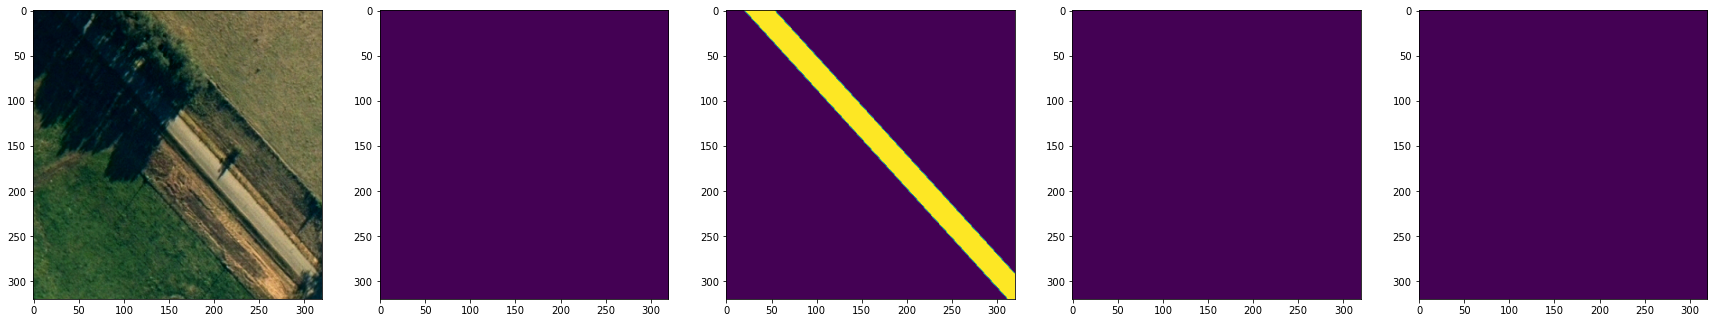

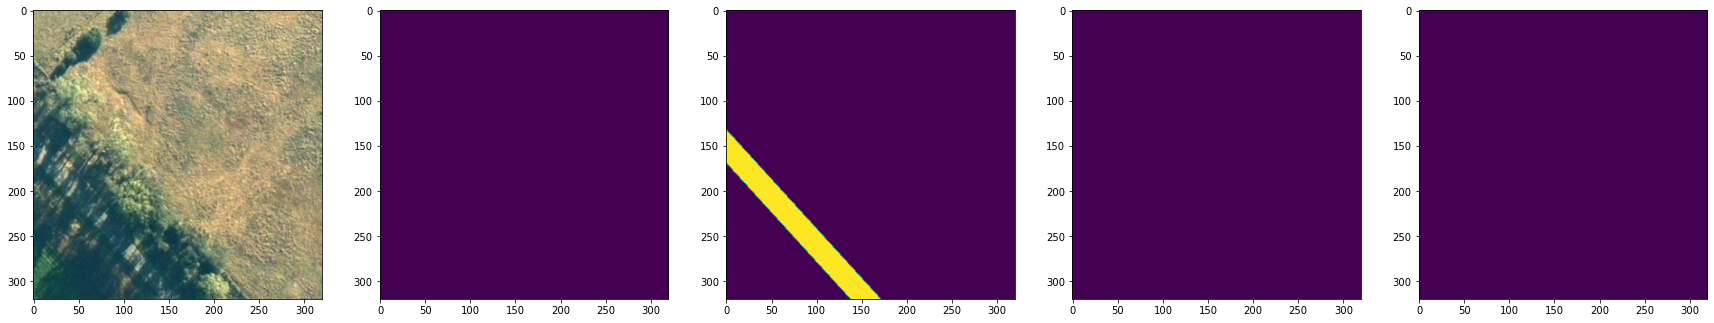

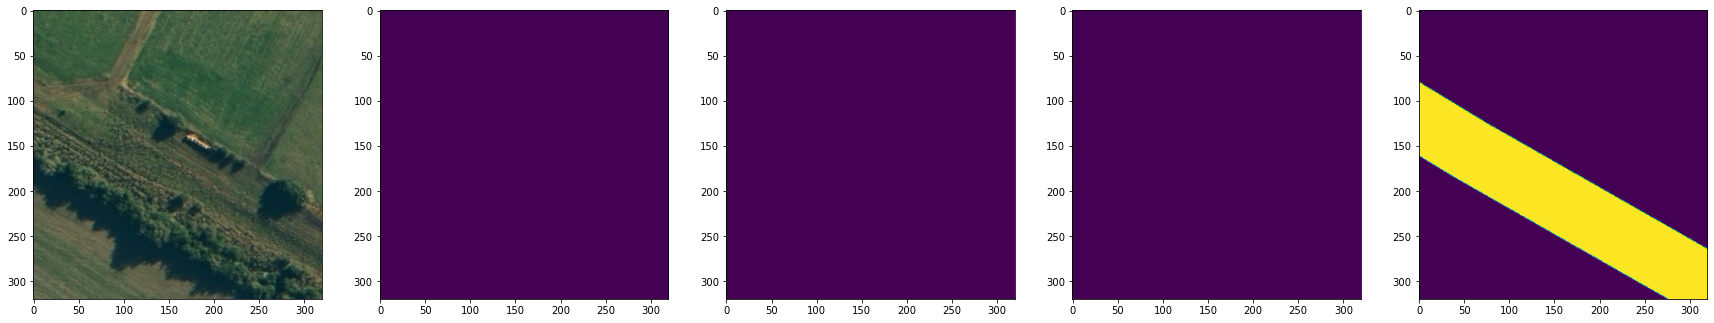

In [3]:
plot_data_generator(train_config=config, num_samples=3, fig_size=(30,6))

Ejecuta el entrenamiento

In [ ]:
train(config)